In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15530, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15530 (delta 5), reused 11 (delta 4), pack-reused 15514
Receiving objects: 100% (15530/15530), 14.22 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (10417/10417), done.


In [2]:
cd /content/darknet

/content/darknet


In [3]:
#GPU와 OPENCV의 사용이 가능하도록  makefile을 수정하기
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [4]:
# make를 이용하여 darknet를 build
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 

In [5]:
# helper함수들
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)  #경로로부터 이미지를 불러읽어들여서
  height, width = image.shape[:2]   #현재 영상의 height와 width를 읽어서
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC) #영상을 3배로 키운다(크게 보여주기 위해서)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  #opencv로 읽어들인 영상은 BGR포맷을 갖기 때문에 RGB포맷으로 변환해야 함
  plt.show()

# google colab으로 파일을 업로드할 때 사용하는 함수를 정의
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# google colab에서 파일을 다운로드할 때 사용하는 함수를 정의
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
%cd ..
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

/content
Mounted at /content/gdrive


In [7]:
# 다음은 /content/gdrive/My\ Drive/ 의 경로를 /mydrive 로 접근할 수 있도록 링크를 만들어준다.
!ln -sf /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   images   yolov3


In [8]:
# 압축한 zip파일을 넣은 폴더
!ls /mydrive/yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom.cfg


In [9]:
cd /content/darknet

/content/darknet


In [10]:
# obj.zip파일을 클라우드의 root directory로 copy하기
!cp /mydrive/yolov3/obj.zip ../

In [11]:
!ls

3rdparty		darknet.py	       net_cam_v4.sh
backup			darknet_video.py       obj
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
darknet			LICENSE		       vcpkg.json.opencv23
DarknetConfig.cmake.in	Makefile	       video_yolov3.sh
darknet_images.py	net_cam_v3.sh	       video_yolov4.sh


In [12]:
# 다음과 같이 zip파일을 압축풀기하면 파일안의 내용들이 /darknet/data/obj 안에 있게 된다
!unzip ../obj.zip -d data/obj/

Archive:  ../obj.zip
  inflating: data/obj/00329773aa14e3ad.jpg  
  inflating: data/obj/00329773aa14e3ad.txt  
  inflating: data/obj/003af63a783a1615.jpg  
  inflating: data/obj/003af63a783a1615.txt  
  inflating: data/obj/004eb6ca27183afe.jpg  
  inflating: data/obj/004eb6ca27183afe.txt  
  inflating: data/obj/0065a51ab60e59fe.jpg  
  inflating: data/obj/0065a51ab60e59fe.txt  
  inflating: data/obj/0065a9f1ac8ca2b4.jpg  
  inflating: data/obj/0065a9f1ac8ca2b4.txt  
  inflating: data/obj/006fb86aed487201.jpg  
  inflating: data/obj/006fb86aed487201.txt  
  inflating: data/obj/010dce7cb9251d5e.jpg  
  inflating: data/obj/010dce7cb9251d5e.txt  
  inflating: data/obj/0127cf8617e6b52f.jpg  
  inflating: data/obj/0127cf8617e6b52f.txt  
  inflating: data/obj/013bc45321bef9c3.jpg  
  inflating: data/obj/013bc45321bef9c3.txt  
  inflating: data/obj/0148c4e77ea54960.jpg  
  inflating: data/obj/0148c4e77ea54960.txt  
  inflating: data/obj/016f96522808c092.jpg  
  inflating: data/obj/016f96522808

In [13]:
# 커스텀 .cfg 파일을 다시 클라우드로 올림
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [14]:
# obj.names 와 obj.data 파일들을 구글 드라이브에서 클라우드로 올리기
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [15]:
# 구글드라이브의 generate_train.py 스크립트를 클라우드로 올리기
!cp /mydrive/yolov3/generate_train.py ./

In [16]:
!python generate_train.py

In [17]:
# darknet/data폴더내에 train.txt이 존재함을 확인해보기
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# 사전학습된 convolutional layer weights를 다운로드하
#!wget http://pjreddie.com/media/files/darknet53.conv.74

--2023-06-20 20:50:26--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2023-06-20 20:50:27--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.5MB/s    in 8.2s    

2023-06-20 20:50:36 (19.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# 커스텀 detector를 학습시키기. 기존에 학습하다 말았으면 backup에 있는 weight를 불러서 학습하는 셀로 이동하기
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 354018, rewritten_bbox = 0.995995 % 
]2;3926/4000: loss=0.1 hours left=0.3
 3926: 0.086485, 0.122446 avg loss, 0.000010 rate, 8.006471 seconds, 251264 images, 0.268082 hours left
Loaded: 0.000081 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.885779), count: 4, class_loss = 0.019438, iou_loss = 0.076336, total_loss = 0.095774 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000005, iou_loss = 0.000000, total_loss = 0.000005 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000063, iou_loss = 0.000000, total_loss = 0.000063 
 total_bbox = 354022, rewritten_bbox = 0.995983 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.859270), count: 4, class_loss = 0.001578, iou_loss = 0.049004, total_loss = 0.050582 
v3 (mse loss, Normal

In [18]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Short

In [19]:
# custom cfg 를 test mode 로 바꾸기
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

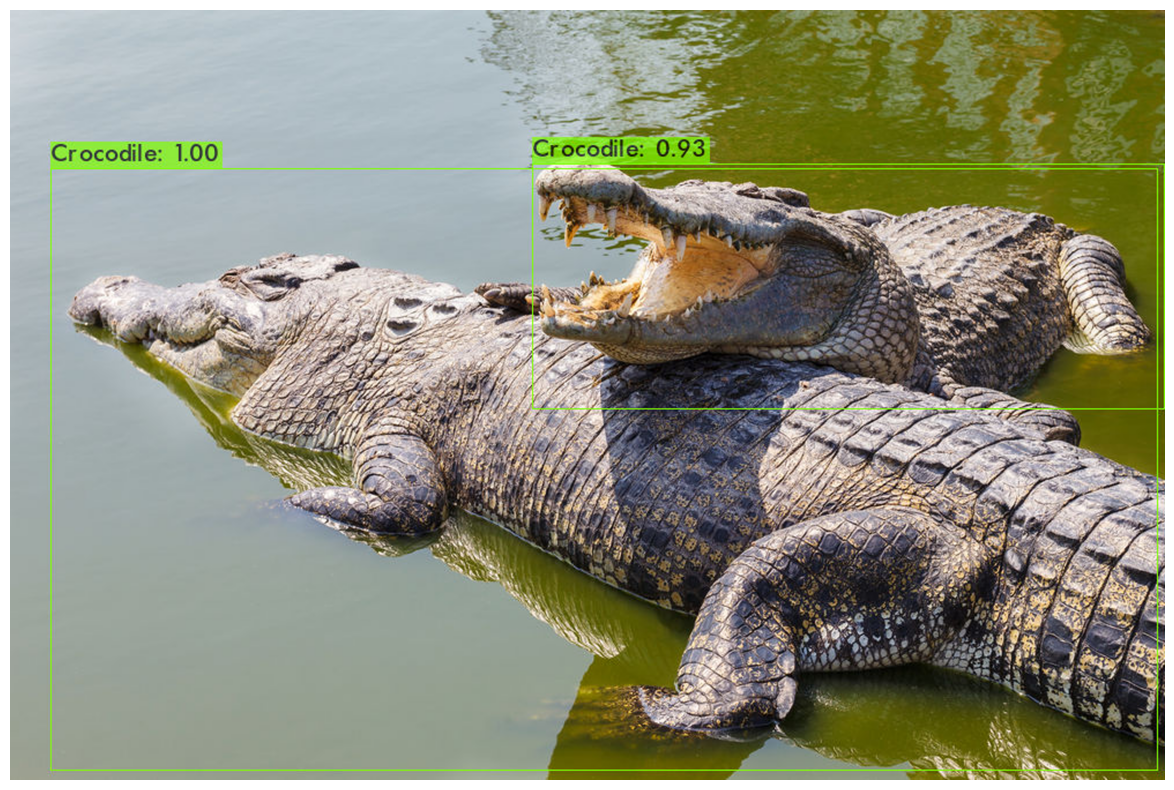

In [29]:
# 구글 드라이브로 원하는 영상을 업로드한 후에 커스텀 detector를 돌리기. 여기서 -thresh 0.3은 Accuracy가 0.3이하가 되는 Object의 Bounding Box는 보이지 않게 하겠다는 뜻임
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_custom_last.weights /content/gdrive/MyDrive/images/Crocodile.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

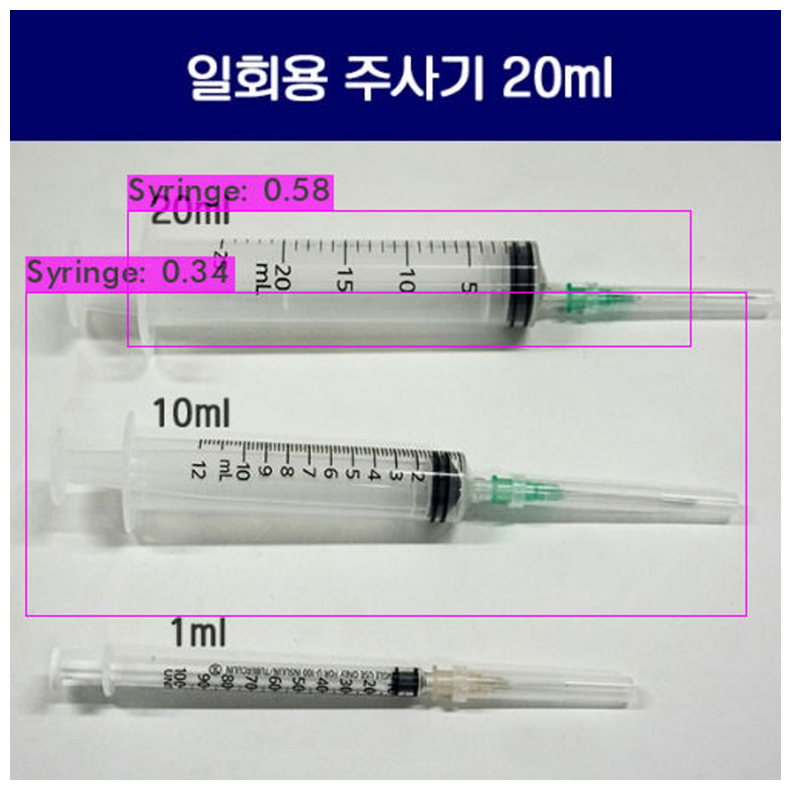

In [30]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_custom_last.weights /content/gdrive/MyDrive/images/Syringe.jpg -thresh 0.3
imShow('predictions.jpg')